# Instituto Tecnológico de Las Américas (ITLA)

## Análisis de las acciones de META Inc.

### Analítica de datos para finanzas

Sustentantes:
- Leandro Díaz (2023-0006)
- Laura Ramírez (2023-0132)
- Jesús Araujo (2022-1894)

**Prof.:** Gregory De La Rosa

**Fecha:** *2/10/2024*

# Meta Platforms Inc.

 Conocida anteriormente como Facebook, Inc., es una compañía global de tecnología y redes sociales con sede en Menlo Park, California, fundada en 2004 por Mark Zuckerberg junto con sus compañeros de universidad. Inició como una red social universitaria y rápidamente evolucionó hasta convertirse en una de las plataformas más grandes y dominantes en el sector de las redes sociales. A lo largo de los años, Meta ha adquirido e integrado otras plataformas importantes como Instagram, WhatsApp, y Oculus, ampliando así su alcance, servicios y convirtiendose en empresa matriz.

En 2021, Facebook Inc. cambió su nombre a Meta Platforms, Inc. para reflejar su visión centrada en el "metaverso", un espacio virtual donde las personas pueden interactuar mediante avatares en entornos virtuales 3D, explorando nuevas formas de socializar, trabajar y jugar en línea. La compañía aspira a liderar el desarrollo de esta nueva era tecnológica, invirtiendo en realidad virtual (VR), realidad aumentada (AR), inteligencia artificial, y conectividad avanzada.

Además de sus plataformas de redes sociales y servicios de mensajería, Meta se enfoca en desarrollar tecnologías inmersivas, como los dispositivos de realidad virtual de Oculus y el software de realidad aumentada. Su modelo de negocio se basa principalmente en la publicidad digital, ya que sus plataformas sociales atraen a miles de millones de usuarios activos mensuales y ofrecen una segmentación publicitaria detallada. Actualmente, Meta se enfrenta a la competencia de otras redes sociales y plataformas emergentes, así como a desafíos de privacidad y regulación.

# Importación de datos

In [1]:
# pip install yfinance

In [2]:
# Librerías
import yfinance as yf # No se necesita pandas porque esta la trae con esta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga de datos
df = yf.download('META', start='2021-01-01', end='2024-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
Date,,,,,,
2021-01-04 00:00:00+00:00,268.132690,268.940002,275.000000,265.200012,274.779999,15106100
2021-01-05 00:00:00+00:00,270.156586,270.970001,272.399994,268.209991,268.290009,9871600
2021-01-06 00:00:00+00:00,262.519592,263.309998,267.750000,260.010010,262.000000,24354100
2021-01-07 00:00:00+00:00,267.933258,268.739990,271.609985,264.779999,265.899994,15789800
2021-01-08 00:00:00+00:00,266.766785,267.570007,268.950012,263.179993,268.309998,18528300


In [4]:
# El dataframe tiene multiíndices, el de Ticker no se necesita
df.columns

MultiIndex([('Adj Close', 'META'),
            (    'Close', 'META'),
            (     'High', 'META'),
            (      'Low', 'META'),
            (     'Open', 'META'),
            (   'Volume', 'META')],
           names=['Price', 'Ticker'])

In [5]:
# Borrar índice ticker, datos listos
df = df.stack()
df = df.reset_index(level=1, drop=True)
df.head()

<ipython-input-5-fac4f4dc2a91>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack()


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04 00:00:00+00:00,268.132690,268.940002,275.000000,265.200012,274.779999,15106100
2021-01-05 00:00:00+00:00,270.156586,270.970001,272.399994,268.209991,268.290009,9871600
2021-01-06 00:00:00+00:00,262.519592,263.309998,267.750000,260.010010,262.000000,24354100
2021-01-07 00:00:00+00:00,267.933258,268.739990,271.609985,264.779999,265.899994,15789800
2021-01-08 00:00:00+00:00,266.766785,267.570007,268.950012,263.179993,268.309998,18528300


# Análisis exploratorio de datos

In [6]:
# Primeras filas
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04 00:00:00+00:00,268.132690,268.940002,275.000000,265.200012,274.779999,15106100
2021-01-05 00:00:00+00:00,270.156586,270.970001,272.399994,268.209991,268.290009,9871600
2021-01-06 00:00:00+00:00,262.519592,263.309998,267.750000,260.010010,262.000000,24354100
2021-01-07 00:00:00+00:00,267.933258,268.739990,271.609985,264.779999,265.899994,15789800
2021-01-08 00:00:00+00:00,266.766785,267.570007,268.950012,263.179993,268.309998,18528300


In [7]:
# Últimas filas
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-22 00:00:00+00:00,352.329193,353.390015,357.200012,351.220001,355.579987,11764200
2023-12-26 00:00:00+00:00,353.764832,354.829987,356.980011,353.450012,354.989990,9898600
2023-12-27 00:00:00+00:00,356.755859,357.829987,359.000000,355.309998,356.070007,13207900
2023-12-28 00:00:00+00:00,357.244385,358.320007,361.899994,357.809998,359.700012,11798800
2023-12-29 00:00:00+00:00,352.897461,353.959991,360.000000,351.820007,358.989990,14980500


In [8]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-01-04 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  753 non-null    float64
 1   Close      753 non-null    float64
 2   High       753 non-null    float64
 3   Low        753 non-null    float64
 4   Open       753 non-null    float64
 5   Volume     753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


In [9]:
# Estadísticos básicos
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,253.575254,254.338739,257.952244,250.760823,254.154197,2.620642e+07
std,78.125920,78.361148,78.739298,77.835216,78.398334,1.785264e+07
min,88.643112,88.910004,90.459999,88.089996,90.080002,5.467500e+06
25%,184.344955,184.899994,190.360001,182.259995,186.130005,1.658080e+07
50%,270.505554,271.320007,274.250000,268.119995,270.519989,2.192460e+07
75%,323.486023,324.459991,328.239990,319.600006,323.690002,3.000160e+07
max,381.032745,382.179993,384.329987,378.809998,381.679993,2.323166e+08


# Limpieza de datos

In [10]:
duplicados = df[df.duplicated()]
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
Empty DataFrame
Columns: [Adj Close, Close, High, Low, Open, Volume]
Index: []


In [11]:
faltantes_cierre = df[df['Close'].isna()]
print("Filas con valores faltantes en 'Close':\n")
print(faltantes_cierre)

Filas con valores faltantes en 'Close':

Empty DataFrame
Columns: [Adj Close, Close, High, Low, Open, Volume]
Index: []


In [12]:
# Verificar otros valores faltantes en el DataFrame
faltantes_otros = df[df.isna().any(axis=1)]
print("Filas con otros valores faltantes:\n")
print(faltantes_otros)

Filas con otros valores faltantes:

Empty DataFrame
Columns: [Adj Close, Close, High, Low, Open, Volume]
Index: []


In [13]:
# Sumar los valores nulos
print(df.isna().sum())

Price
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Análisis univariante

## Distribución del retorno diario

In [14]:
# Creación de la variable retorno diario
df["Daily Return"] = df["Adj Close"].pct_change()

# Revisión rápida del retorno diario
df["Daily Return"].head()

,Daily Return
Date,
2021-01-04 00:00:00+00:00,NaN
2021-01-05 00:00:00+00:00,0.007548
2021-01-06 00:00:00+00:00,-0.028269
2021-01-07 00:00:00+00:00,0.020622
2021-01-08 00:00:00+00:00,-0.004354


In [15]:
df["Daily Return"].tail()

,Daily Return
Date,
2023-12-22 00:00:00+00:00,-0.001977
2023-12-26 00:00:00+00:00,0.004075
2023-12-27 00:00:00+00:00,0.008455
2023-12-28 00:00:00+00:00,0.001369
2023-12-29 00:00:00+00:00,-0.012168


In [16]:
df["Daily Return"].describe()

,Daily Return
count,752.000000
mean,0.000816
std,0.029674
min,-0.263901
25%,-0.012067
50%,0.000418
75%,0.014883
max,0.232824


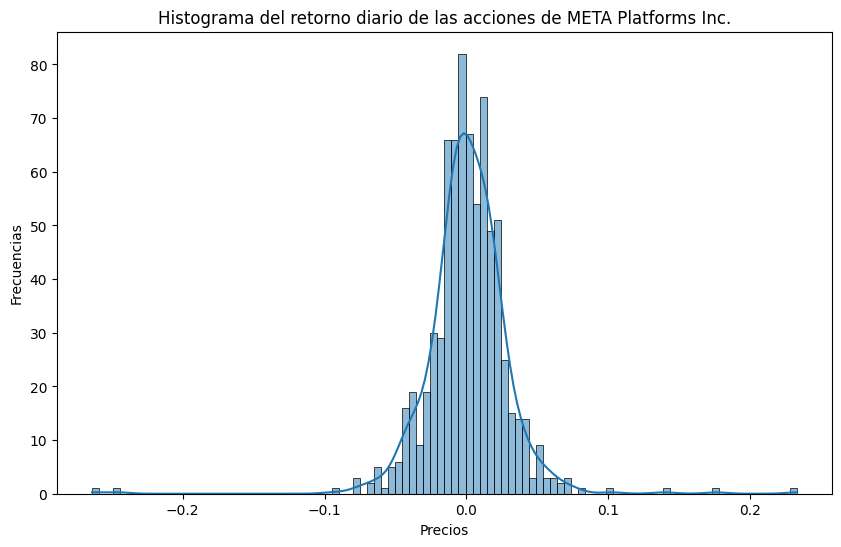

In [17]:
# Histograma del retorno diario
plt.figure(figsize=(10, 6))
sns.histplot(x=df["Daily Return"], bins=100, kde=True)
plt.title("Histograma del retorno diario de las acciones de META Platforms Inc.")
plt.xlabel("Precios")
plt.ylabel("Frecuencias")
plt.show()

## Estadísticos del precio de cierre ajustado

In [18]:
df["Adj Close"].describe()

,Adj Close
count,753.000000
mean,253.575254
std,78.125920
min,88.643112
25%,184.344955
50%,270.505554
75%,323.486023
max,381.032745


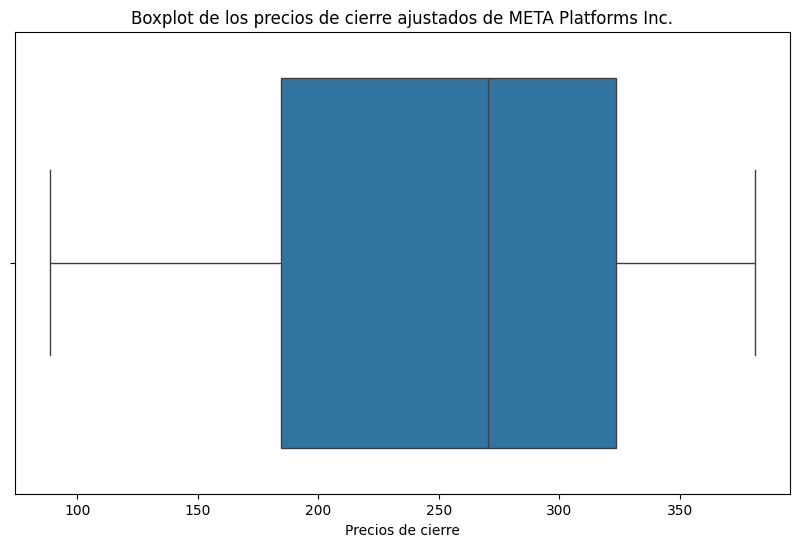

In [19]:
# Boxplot de precios de cierre ajustados
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Adj Close"])
plt.title("Boxplot de los precios de cierre ajustados de META Platforms Inc.")
plt.xlabel("Precios de cierre")
plt.show()

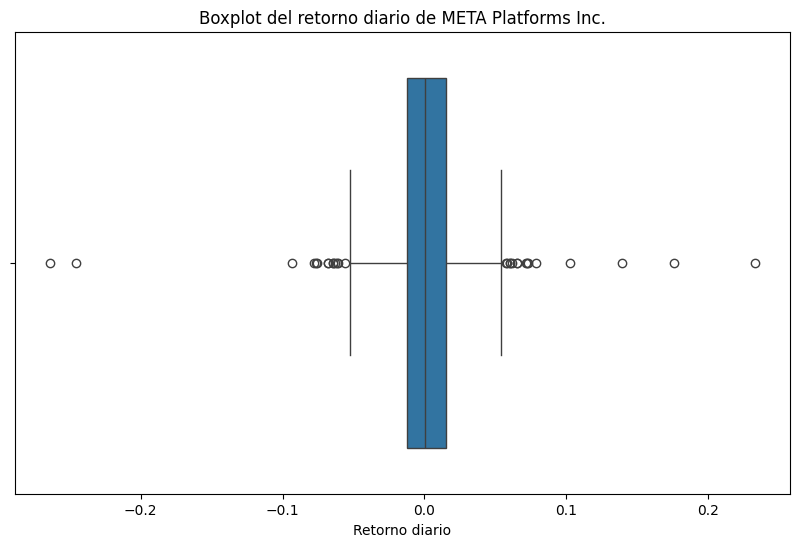

In [20]:
# Boxplot del retorno diario
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Daily Return"])
plt.title("Boxplot del retorno diario de META Platforms Inc.")
plt.xlabel("Retorno diario")
plt.show()

## Tendencia de los precios de cierre ajustados

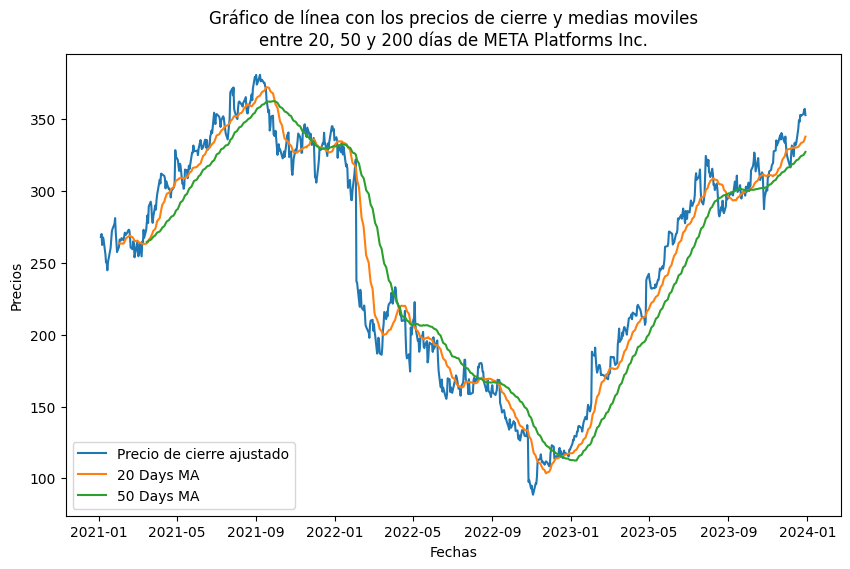

In [21]:
# Creación de medias moviles entre 20, 50 y 200 días
df["20 Days MA"] = df["Adj Close"].rolling(window=20).mean()
df["50 Days MA"] = df["Adj Close"].rolling(window=50).mean()

# Gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df[["Adj Close", "20 Days MA", "50 Days MA"]], label=["Precio de cierre ajustado", "20 Days MA", "50 Days MA"])
plt.title("Gráfico de línea con los precios de cierre y medias moviles\nentre 20, 50 y 200 días de META Platforms Inc.")
plt.xlabel("Fechas")
plt.ylabel("Precios")
plt.legend()
plt.show()

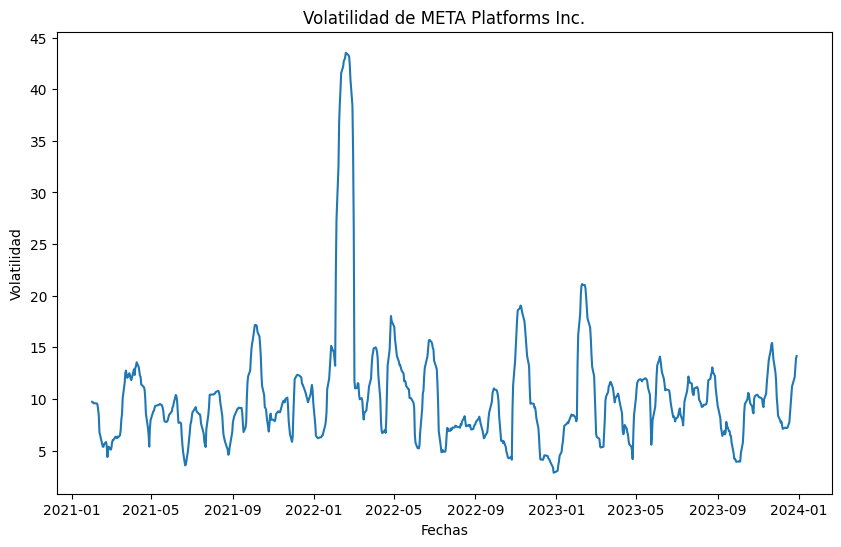

In [22]:
df["Volatility"] = df["Adj Close"].rolling(window=20).std()

plt.figure(figsize=(10, 6))
plt.plot(df["Volatility"])
plt.title("Volatilidad de META Platforms Inc.")
plt.xlabel("Fechas")
plt.ylabel("Volatilidad")
plt.show()

# Análisis multivariante

## Correlación entre precios

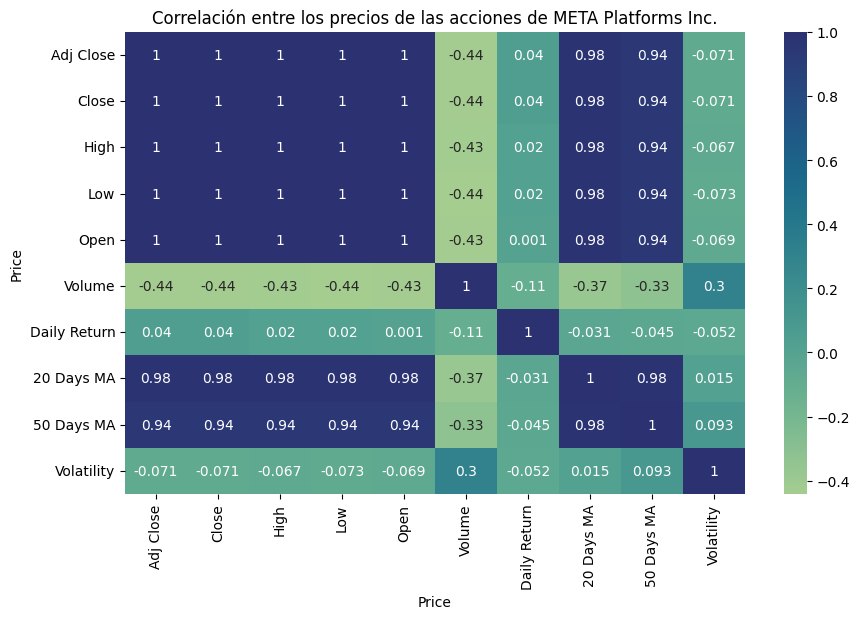

In [23]:
# Matriz correlación de las acciones de META Platforms Inc.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.title("Correlación entre los precios de las acciones de META Platforms Inc.")
plt.show()

# Análisis de dividendos

In [24]:
yf.Ticker('META').dividends

,Dividends
Date,
2024-02-21 00:00:00-05:00,0.5
2024-06-14 00:00:00-04:00,0.5
2024-09-16 00:00:00-04:00,0.5


<Axes: xlabel='Date'>

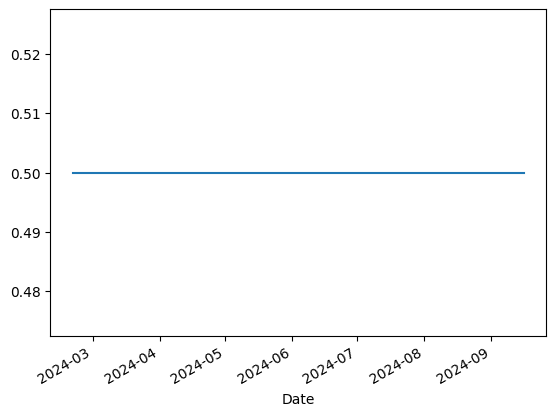

In [25]:
yf.Ticker('META').dividends.plot()

# Conclusiones

## Resumen de los hallazgos clave

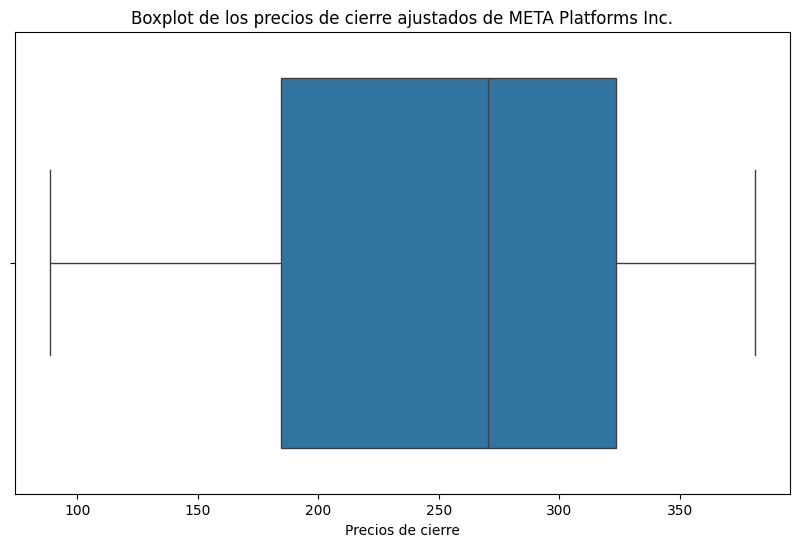

In [26]:
# Boxplot de precios de cierre ajustados
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Adj Close"])
plt.title("Boxplot de los precios de cierre ajustados de META Platforms Inc.")
plt.xlabel("Precios de cierre")
plt.show()

## Análisis de tendencias y patrones observados

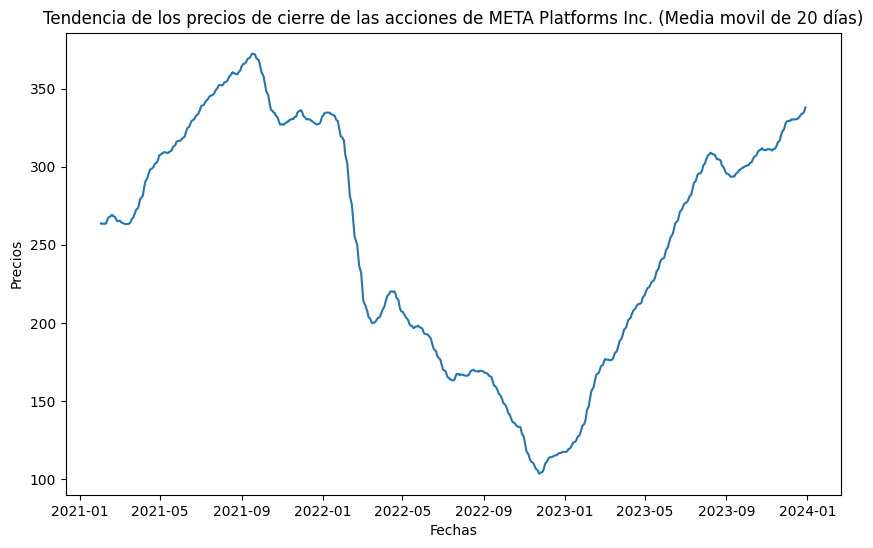

In [27]:
# Tendencia de los precios de cierre de las acciones de META Platforms Inc.
plt.figure(figsize=(10, 6))
plt.plot(df["20 Days MA"])
plt.title("Tendencia de los precios de cierre de las acciones de META Platforms Inc. (Media movil de 20 días)")
plt.xlabel("Fechas")
plt.ylabel("Precios")
plt.show()

## Posibles próximos pasos o recomendaciones para análisis adicionales

Para análisis posteriores, se pueden aplicar técnicas de aprendizaje automátizado de series temporales. Esto con el objetivo de realizar forecasting (o pronóstico) a los precios de cierre de las acciones. Dos técnicas muy utilizadas son:
- ARIMA: Un modelo de aprendizaje automático utiliza técnicas complejas de autorregresión y de medias moviles (esta última vista previamente) para predecir los precios de cierre en base a resultados anteriores.
- Suavisado exponencial: Otro modelo para series temporales pero con un mayor enfoque a datos recientes.